### Here we look at the predicted change in sea-ice fraction in the Arctic between any 2 decades. We utilise all ensemble members and take their mean i.e. the ensemble mean and then plot the decadal difference. This gives us a more well rounded and acceptable figure because it accounts for several possibilities (for initial condition) instead of just one (see Cicepractice).
### We plot decadal difference for only SSP, only ARISE and then SSP - ARISE for comparison.         

In [1]:
 # analysis
import io
import os
import sys
import warnings
import numpy as np
import xarray as xr
import pandas as pd
# for calculations and masking regions
import numpy as np
import numpy.ma as ma

# for making figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.path as mpath

# for making maps
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

workingdir = '/Users/dpathak/Desktop/REU/notebooks/'   
dataDir = '/Users/dpathak/Desktop/REU/data/Cicefraction/'
figuredir = '/Users/dpathak/Desktop/REU/figures/IceFrac, IceThic/'
ens = ['001','002','003','004','005','006','007','008','009','010']
   
   
   
#### read data
# make empty dictionaries to hold all ensemble members
iceAreaCONTROL  = {}
iceAreaFEEDBACK = {}
iceAreaFEEDBACKGrouped = {}
iceAreaCONTROLGrouped = {}
#adding the next two for Septmeber plots
# iceAreaFEEDBACKsept = {}
# iceAreaCONTROLsept = {}
# loop through each file and store in dictionary
for ensNum in range(len(ens)):
    ## ARISE
    ds = xr.open_dataset(dataDir +
                             'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.' + str(ens[ensNum]) +
                             '.cam.h0.ICEFRAC.203501-206912_NH.nc')
    # get the correct time stamp since xarray has trouble reading it
    ds['time'] = pd.date_range(start=pd.to_datetime("2035-01-01"),
                                               periods=ds.sizes['time'], freq='MS')
    latIce = ds.lat; lonIce = ds.lon
    iceAreaFEEDBACK[ens[ensNum]] =ds.ICEFRAC
    ds.close()
       
    ## SSP
    ds = xr.open_dataset(dataDir +
                             'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.' + str(ens[ensNum]) +
                             '.cam.h0.ICEFRAC.201501-206912_NH.nc')
    ds['time'] = pd.date_range(start=pd.to_datetime("2015-01-01"),
                                               periods=ds.sizes['time'], freq='MS')
    print(ds.time)
    iceAreaCONTROL[ens[ensNum]] = ds.ICEFRAC
    ds.close()
    iceAreaFEEDBACKGrouped[ens[ensNum]] = iceAreaFEEDBACK[ens[ensNum]].groupby('time.year').mean(dim='time', skipna = True)
    iceAreaCONTROLGrouped[ens[ensNum]] = iceAreaCONTROL[ens[ensNum]].groupby('time.year').mean(dim='time', skipna = True)
#this has found yearly means for each ensemble member; now i need to find means over decades 
#for the WHOLE ENSEMBLE; I need a loop for that

<xarray.DataArray 'time' (time: 660)>
array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', ..., '2069-10-01T00:00:00.000000000',
       '2069-11-01T00:00:00.000000000', '2069-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2069-12-01
<xarray.DataArray 'time' (time: 660)>
array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', ..., '2069-10-01T00:00:00.000000000',
       '2069-11-01T00:00:00.000000000', '2069-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2069-12-01
<xarray.DataArray 'time' (time: 660)>
array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', ..., '2069-10-01T00:00:00.000000000',
       '2069-11-01T00:00:00.000000000', '2069-12-01T00:

In [2]:
#getting decadal ensemble means using a for loop
#defining some empty variables that can be updated in the loop
##TS is for timeseries
controlvar1 = 0
controlvar2 = 0
feedbackvar1 = 0
feedbackvar2 = 0
ARISEicefracTS = 0
controlvar3 = 0
feedbackvar3 = 0
SSPicefracTS = 0
for ensNum in range(len(ens)):
    feedbackvar1 = feedbackvar1 + np.mean(iceAreaFEEDBACKGrouped[ens[ensNum]][:10, :, :], axis = 0)
    iceAreaFEEDBACK_20352044 = feedbackvar1
    ARISEicefracTS = ARISEicefracTS + iceAreaFEEDBACKGrouped[ens[ensNum]] #adds all yearly means of 10 ensNum
    feedbackvar2 = feedbackvar2 + np.mean(iceAreaFEEDBACKGrouped[ens[ensNum]][20:30, :, :], axis = 0)
    iceAreaFEEDBACK_20552064 = feedbackvar2
    feedbackvar3 = feedbackvar3 + np.mean(iceAreaFEEDBACKGrouped[ens[ensNum]][10:20, :, :], axis = 0)
    iceAreaFEEDBACK_20452054 = feedbackvar3
    controlvar1 = controlvar1 + np.mean(iceAreaCONTROLGrouped[ens[ensNum]][20:30, :, :], axis =0)
    iceAreaCONTROL_20352044 = controlvar1
    SSPicefracTS = SSPicefracTS + iceAreaCONTROLGrouped[ens[ensNum]]#adds all yearly means for 10 ensNum
    controlvar2 = controlvar2 + np.mean(iceAreaCONTROLGrouped[ens[ensNum]][40:50, :, :], axis = 0)
    iceAreaCONTROL_20552064 = controlvar2
    controlvar3 = controlvar3 + np.mean(iceAreaCONTROLGrouped[ens[ensNum]][30:40, :, :], axis =0)
    iceAreaCONTROL_20452054 = controlvar3
#now finding mean by dividing by 10
iceAreaCONTROLMean_20352044 = (iceAreaCONTROL_20352044)/10
iceAreaCONTROLMean_20552064 = (iceAreaCONTROL_20552064)/10
iceAreaFEEDBACKMean_20352044 = (iceAreaFEEDBACK_20352044)/10
iceAreaFEEDBACKMean_20552064 = (iceAreaFEEDBACK_20552064)/10 
#adding a decade
iceAreaCONTROLMean_20452054 = iceAreaCONTROL_20452054/10
iceAreaFEEDBACKMean_20452054 = iceAreaFEEDBACK_20452054/10
ARISEicefracTSmean = ARISEicefracTS/10   #ensemble mean for each year!!!
SSPicefracTSmean = SSPicefracTS/10

In [3]:
# np.isnan(timeseriesARISEmean)
np.isnan(iceAreaFEEDBACK[ens[0]][0, :10, 60:70])

<xarray.DataArray 'ICEFRAC' (lat: 10, lon: 10)>
array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])
Coordinates:
  * lat      (lat) float64 50.42 51.36 52.3 53.25 ... 56.07 57.02 57.96 58.9
  * lon      (lon) float64 75.0 76.25 77.5 78.75 80.0 ... 82.5 83.75 85.0 86.25
    time     datetime64[ns] 2035-01-01
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by sea-ice
    cell_methods:  time: mean

In [4]:
#finding difference in decadal means within control and response
iceAreaCONTROLMeanDiff = iceAreaCONTROLMean_20552064 - iceAreaCONTROLMean_20352044
iceAreaFEEDBACKMeanDiff = iceAreaFEEDBACKMean_20552064 - iceAreaFEEDBACKMean_20352044
iceAreaMeanDiff_CONTROL_FEEDBACK = iceAreaCONTROLMeanDiff - iceAreaFEEDBACKMeanDiff
iceAreaMeanDiff_CONTROL_FEEDBACK.shape

(43, 288)

In [5]:
#finding difference between SSP and ARISE for 3 decades
iceAreaSSP_ARISE203544 = iceAreaCONTROLMean_20352044 - iceAreaFEEDBACKMean_20352044
iceAreaSSP_ARISE204554 = iceAreaCONTROLMean_20452054 - iceAreaFEEDBACKMean_20452054
iceAreaSSP_ARISE205564 = iceAreaCONTROLMean_20552064 - iceAreaFEEDBACKMean_20552064
np.max(iceAreaSSP_ARISE204554)

<xarray.DataArray 'ICEFRAC' ()>
array(0.0331044)

In [6]:
#generating plots
def make_maps(var,latitude,longitude,vmins,vmaxs,mycmap,label,title,savetitle):
    # Add cyclic point
    var,lonIce = add_cyclic_point(var,coord=longitude)
    
    # Create figure
    fig = plt.figure(figsize=(8,5))
    if vmins < 0. and vmins > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
        
    # Create North Pole Stereo projection map, circle boundary
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latitude,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    if vmins < 0.:
        cbar = plt.colorbar(cf1, ax=ax, extend="both", orientation = 'horizontal')
    else:
        cbar = plt.colorbar(cf1, ax=ax, extend="max", orientation = 'horizontal')
    cbar.set_label(str(label), fontsize=12)
    plt.title(str(title), fontsize=13)
    plt.savefig(figuredir + str(savetitle) + '.jpg', dpi=1000, bbox_inches='tight')
    return fig, ax

-0.12142643 0.02511727
-0.1102643 0.0884845
-0.0892843 0.1709218


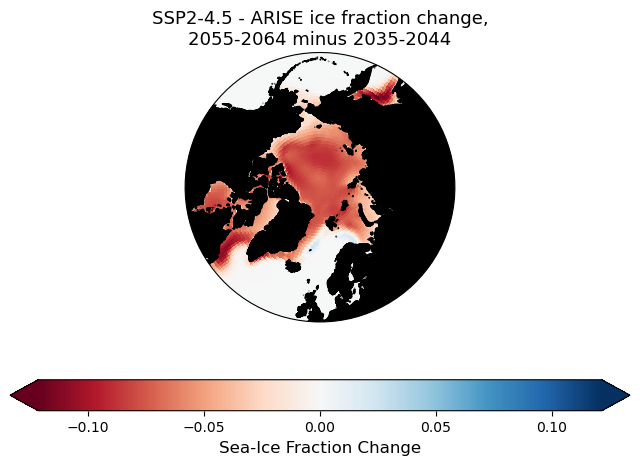

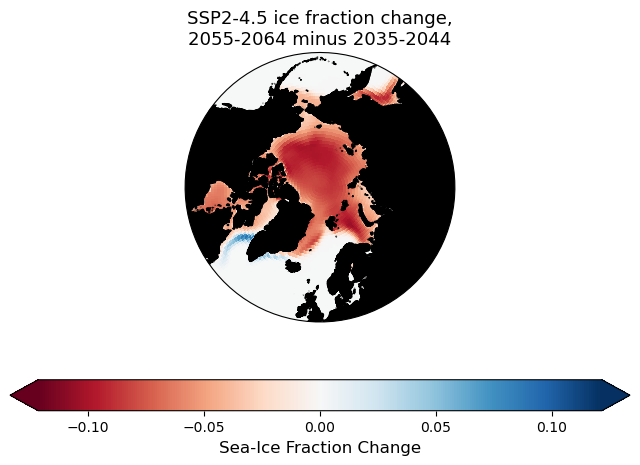

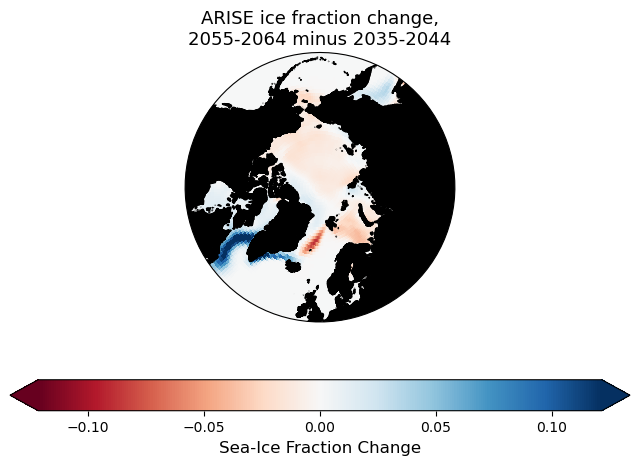

In [7]:
#for control-feedback plot
vmin = np.nanmin(iceAreaMeanDiff_CONTROL_FEEDBACK)
vmax = np.nanmax(iceAreaMeanDiff_CONTROL_FEEDBACK)
print(vmin, vmax)

#for control plot
vmin1 = np.nanmin(iceAreaCONTROLMeanDiff)
vmax1 = np.nanmax(iceAreaCONTROLMeanDiff)
print(vmin1, vmax1)

#for feedback plot
vmin2 = np.nanmin(iceAreaFEEDBACKMeanDiff)
vmax2 = np.nanmax(iceAreaFEEDBACKMeanDiff)
print(vmin2, vmax2)

# To get a nice colorbar, vmin and vmax should be negative and positive values of the same number
if np.abs(vmin) > vmax: vmax = np.abs(vmin)
elif vmax > np.abs(vmin): vmin = vmax*(-1)

warnings.simplefilter("ignore")
fig, ax = make_maps(iceAreaMeanDiff_CONTROL_FEEDBACK,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Fraction Change','SSP2-4.5 - ARISE ice fraction change,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_frac_change_20552064-20352044')
fig, ax = make_maps(iceAreaCONTROLMeanDiff,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Fraction Change','SSP2-4.5 ice fraction change,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_frac_change_20552064-20352044')
fig, ax = make_maps(iceAreaFEEDBACKMeanDiff,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Fraction Change','ARISE ice fraction change,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_frac_change_20552064-20352044')

### DECADAL:Plotting ARISE and SSP ice fractions and difference between decades individually and then SSP-ARISE together.

In [8]:
#ARISE PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namefracARISE):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=-0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'grey', facecolor = 'black'))
    ax.set_title(str(namefracARISE))
    plt.savefig(figuredir + str(namefracARISE) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

<xarray.DataArray 'ICEFRAC' ()>
array(0.97500503)

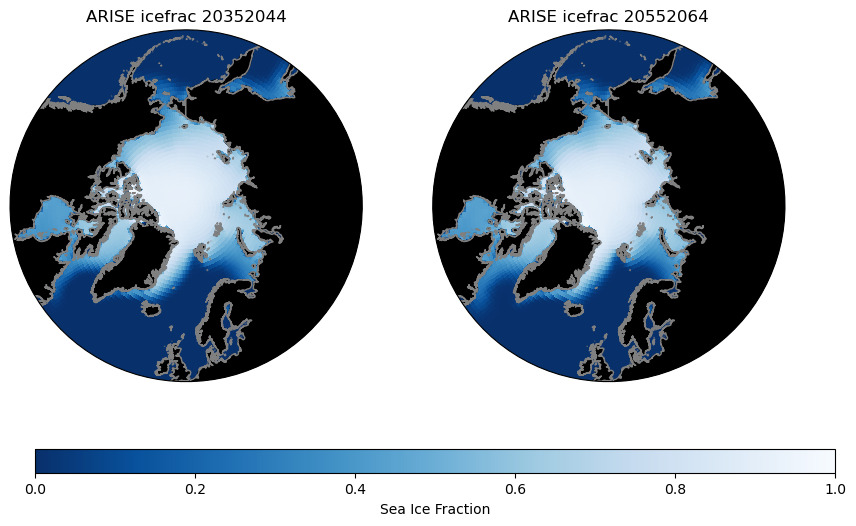

In [9]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = 1
fracdict1 = {}
fracdict1[0] = iceAreaFEEDBACKMean_20352044
fracdict1[1] = iceAreaFEEDBACKMean_20552064
# fracdict1[2] = iceAreaFEEDBACKMeanDiff
namefracARISE = {}
namefracARISE[0] = ('ARISE icefrac 20352044')
namefracARISE[1] = ('ARISE icefrac 20552064')
# namefracARISE[2] = ('ARISE icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(fracdict1[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, fracdict1[i-1], latIce, lonIce, norm, i, mycmap, namefracARISE[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal')
cbar.set_label('Sea Ice Fraction', fontsize = 10)
np.max(iceAreaFEEDBACKMean_20552064)

In [10]:
#SSP plots
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namefracSSP):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'grey', facecolor = 'black'))
    ax.set_title(str(namefracSSP))
    plt.savefig(figuredir + str(namefracSSP) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

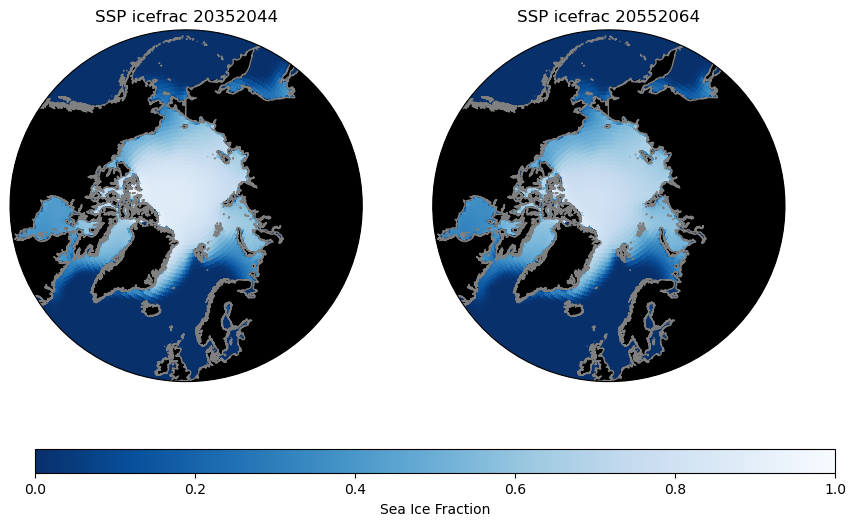

In [11]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = 1
fracdict2 = {}
fracdict2[0] = iceAreaCONTROLMean_20352044
fracdict2[1] = iceAreaCONTROLMean_20552064
# fracdict2[2] = iceAreaCONTROLMeanDiff
namefracSSP = {}
namefracSSP[0] = ('SSP icefrac 20352044')
namefracSSP[1] = ('SSP icefrac 20552064')
# namefracSSP[2] = ('SSP icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(fracdict2[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, fracdict2[i-1], latIce, lonIce, norm, i, mycmap, namefracSSP[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal')
cbar.set_label('Sea Ice Fraction', fontsize = 10)

In [12]:
#plotting 3 side by side
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namefracAll):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namefracAll))
    return cf1

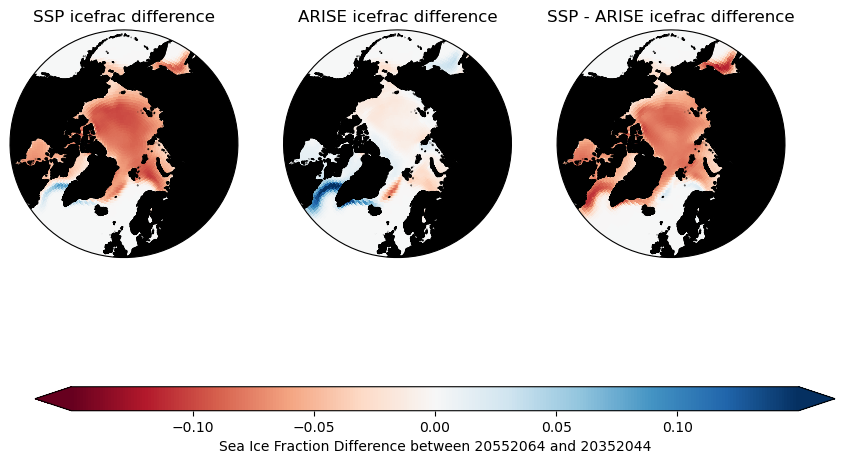

In [13]:
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -0.15
vmaxs = np.abs(vmins)
newdict5 = {}
newdict5[0] = iceAreaCONTROLMeanDiff
newdict5[1] = iceAreaFEEDBACKMeanDiff
newdict5[2] = iceAreaMeanDiff_CONTROL_FEEDBACK
namefracAll = {}
namefracAll[0] = ('SSP icefrac difference')
namefracAll[1] = ('ARISE icefrac difference')
namefracAll[2] = ('SSP - ARISE icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict5[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict5[i-1], latIce, lonIce, norm, i, mycmap, namefracAll[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend="both")
cbar.set_label('Sea Ice Fraction Difference between 20552064 and 20352044', fontsize = 10)
plt.savefig(figuredir + str(namefracAll) + '.jpg', dpi=1000, bbox_inches='tight')

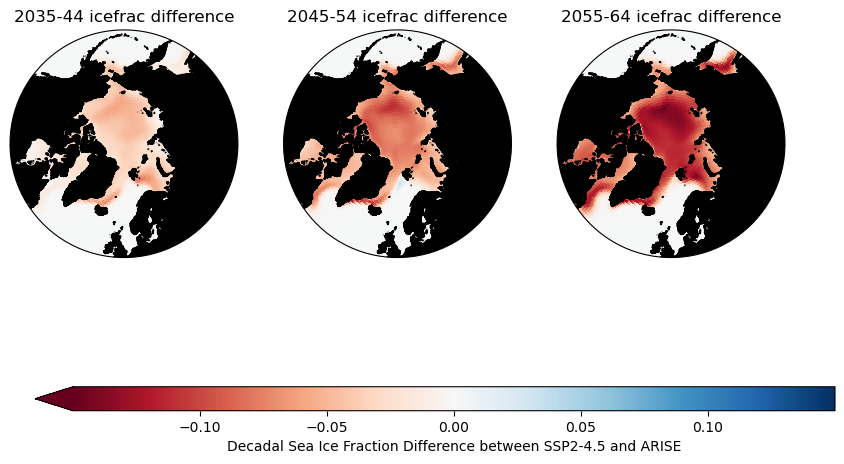

In [14]:
#plotting SSP_ARISE for 3 decades
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -0.15
vmaxs = np.abs(vmins)
newdict272 = {}
newdict272[0] = iceAreaSSP_ARISE203544
newdict272[1] = iceAreaSSP_ARISE204554
newdict272[2] = iceAreaSSP_ARISE205564
namefracAll272 = {}
namefracAll272[0] = ('2035-44 icefrac difference')
namefracAll272[1] = ('2045-54 icefrac difference')
namefracAll272[2] = ('2055-64 icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict272[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict272[i-1], latIce, lonIce, norm, i, mycmap, namefracAll272[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend="min")
cbar.set_label('Decadal Sea Ice Fraction Difference between SSP2-4.5 and ARISE', fontsize = 10)
plt.savefig(figuredir + str(namefracAll) + '.jpg', dpi=1000, bbox_inches='tight')

For control map: ice fraction decreases almost everywhere except southeast/west of Greenland.
For feedback map: ice fraction decreases lesser than control, southwest/east of Greenland sees ice accumulation.
The difference between control and feedback shows that control has lesser ice fraction than feedback in the entire Arctic. 


CONCLUSION: SAI can prevent the reduction of sea-ice fraction pretty well!

### Now we look at decadal ice fraction difference between SSP and ARISE but for September only, since that is when we expect least ice and more shipping.

In [15]:
#We go by the same method but pick out only september means instead of the whole year!
#pick out the first and last decade months from original data and then choose september
#since I want all ensemble members, I need a loop again
#for both decades: 2035-2044 and 2055-2064
random1 = 0
random2 = 0
random3 = 0
random4 = 0
random5 = 0
random6 = 0
septARISEicefracTS = 0
septSSPicefracTS = 0
for ensNum in range(len(ens)):
    #for 2035-2044
    random1= random1 + iceAreaFEEDBACK[ens[ensNum]][:120, :, :] #I think this adds monthly means together
    iceAreaFEEDBACK_20352044 = random1                          #so i should divide by 10 in the end to get
    random2 = random2 + iceAreaCONTROL[ens[ensNum]][240:360, :, :] #120 monthly ensemble means
    iceAreaCONTROL_20352044 = random2       
    #for 2055-2064
    random3 = random3 + iceAreaFEEDBACK[ens[ensNum]][240:360, :, :]
    iceAreaFEEDBACK_20552064 = random3
    random4 = random4 + iceAreaCONTROL[ens[ensNum]][480:600, :, :]
    iceAreaCONTROL_20552064 = random4
    #adding another decade 2045-2054
    random5 = random5 + iceAreaFEEDBACK[ens[ensNum]][120:240, :, :]
    iceAreaFEEDBACK_20452054 = random5
    random6 = random6 + iceAreaCONTROL[ens[ensNum]][360:480, :, :]
    iceAreaCONTROL_20452054 = random6    
    septARISEicefracTS = septARISEicefracTS + iceAreaFEEDBACK[ens[ensNum]]#adds 35*12 months of data of 10 ensNum
    septSSPicefracTS = septSSPicefracTS + iceAreaCONTROL[ens[ensNum]]
    ##I divide by 10 first for 10 ensNum
iceAreaFEEDBACKmean1_20352044 = (iceAreaFEEDBACK_20352044)/10
iceAreaCONTROLmean1_20352044 = (iceAreaCONTROL_20352044)/10
iceAreaFEEDBACKmean1_20552064 = (iceAreaFEEDBACK_20552064)/10
iceAreaCONTROLmean1_20552064 = (iceAreaCONTROL_20552064)/10
iceAreaFEEDBACKmean1_20452054 = (iceAreaFEEDBACK_20452054)/10
iceAreaCONTROLmean1_20452054 = (iceAreaCONTROL_20452054)/10
ALLMONTHSseptARISEicefracTS = septARISEicefracTS/10 
ALLMONTHSseptSSPicefracTS = septSSPicefracTS/10
    ###now i have 120 monthly ensemble means
    #i.e. the ensemble mean for each month of the 2 decades -- i.e. 10 september means
    ###now i group by month and find 12 monthly ensemble means
    #print(iceAreaCONTROLmean1_20552064)
iceAreaFEEDBACKMonthlyEnsMean_20352044 = iceAreaFEEDBACKmean1_20352044.groupby('time.month').mean(dim = 'time', skipna = True)
iceAreaFEEDBACKMonthlyEnsMean_20552064 = iceAreaFEEDBACKmean1_20552064.groupby('time.month').mean(dim = 'time', skipna = True)
iceAreaCONTROLMonthlyEnsMean_20352044 = iceAreaCONTROLmean1_20352044.groupby('time.month').mean(dim = 'time', skipna = True)
iceAreaCONTROLMonthlyEnsMean_20552064 = iceAreaCONTROLmean1_20552064.groupby('time.month').mean(dim = 'time', skipna = True)
iceAreaFEEDBACKMonthlyEnsMean_20452054 = iceAreaFEEDBACKmean1_20452054.groupby('time.month').mean(dim = 'time', skipna = True)
iceAreaCONTROLMonthlyEnsMean_20452054 = iceAreaCONTROLmean1_20452054.groupby('time.month').mean(dim = 'time', skipna = True)
septSSPdata = ALLMONTHSseptSSPicefracTS.groupby('time.month')#monthly EnsMean for 55*12 months now grouped
septARISEdata = ALLMONTHSseptARISEicefracTS.groupby('time.month')

#want September only
#len(iceAreaCONTROLMonthlyEnsMean_20552064) -- is 12
iceAreaFEEDBACKsept_20352044 = iceAreaFEEDBACKMonthlyEnsMean_20352044[8]
iceAreaFEEDBACKsept_20552064 = iceAreaFEEDBACKMonthlyEnsMean_20552064[8]
iceAreaCONTROLsept_20352044 = iceAreaCONTROLMonthlyEnsMean_20352044[8]
iceAreaCONTROLsept_20552064 = iceAreaCONTROLMonthlyEnsMean_20552064[8]
iceAreaFEEDBACKsept_20452054 = iceAreaFEEDBACKMonthlyEnsMean_20452054[8]
iceAreaCONTROLsept_20452054 = iceAreaCONTROLMonthlyEnsMean_20452054[8]
#SSP july-october data
julySSPdataTS = septSSPdata[7]#why does [7:10,:,:] not work?
augSSPdataTS = septSSPdata[8]
septSSPdataTS = septSSPdata[9]
octSSPdataTS = septSSPdata[10]
#ARISE july-october data
julyARISEdataTS = septARISEdata[7]
augARISEdataTS = septARISEdata[8]
septARISEdataTS = septARISEdata[9]
octARISEdataTS = septARISEdata[10]
#season mean
#tried np.mean, ().mean, adding together -- doesn't work -- time:0 -- because they have different months?
#how to fix this?
# JASOarrayARISE = np.concatenate((julyARISEdataTS, augARISEdataTS, septARISEdataTS, octARISEdataTS), axis=0)
# JASOarrayARISE.shape
# JASOmean = JASOarrayARISE.mean(axis=-1)
# # JASOmean.shape
# ariseFinalgrouped = JASOarrayARISE.groupby('time.year').mean(dim = 'time', skipna = True)
septSSPdata[9]

<xarray.DataArray 'ICEFRAC' (time: 55, lat: 43, lon: 288)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.6451964 , 0.6452212 , 0.64534587, ..., 0.64493716,
         0.64501387, 0.64516526],
        [0.6583272 , 0.6584458 , 0.6585599 , ..., 0.65787756,
         0.6580576 , 0.6582005 ],
        [0.66185796, 0.6616915 , 0.66153944, ..., 0.6624638 ,
         0.6622417 , 0.66204065]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.0573277 , 0.0562924 , 0.05523314, ..., 0.05992933,
         0.05910303, 0.05826374],
        [0.05226488, 0.05179781, 0.05130738, ..., 0.05369142,
         0.05321651, 0.05273788],
        [0.05324598, 0.05315692, 0.05307543, ..., 0.05356945,
         0.053451  , 0.05334362]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.0254126 , 0.02532786, 0.02524702, ..., 0.02566684,
         0.02558288, 0.02550224],
        [0.02447477, 0.0244707 , 0.02446509, ..., 0.02448593,
         0.02447975, 0.02447734],
        [0.02463989, 0.02461746, 0.02459705, ..., 0.02472211,
         0.0246919 , 0.02466461]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 50.42 51.36 52.3 53.25 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 2015-09-01 2016-09-01 ... 2069-09-01

In [16]:
#this one works, thanks to Juliette!
#picking months
JASOarraySSP = ALLMONTHSseptSSPicefracTS.sel(time=ALLMONTHSseptSSPicefracTS[:,:,:].time.dt.month.isin([7,8,9,10]))
JASOarrayARISE = ALLMONTHSseptARISEicefracTS.sel(time=ALLMONTHSseptARISEicefracTS[:,:,:].time.dt.month.isin([7,8,9,10]))
#JASO mean every year
JASOmeanSSP = JASOarraySSP.groupby('time.year').mean(dim='time', skipna = True)
JASOmeanARISE = JASOarrayARISE.groupby('time.year').mean(dim='time', skipna = True)

In [17]:
JASOmeanSSP

<xarray.DataArray 'ICEFRAC' (year: 55, lat: 43, lon: 288)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.7843784 , 0.7843195 , 0.78431416, ..., 0.7845658 ,
         0.78449094, 0.78445697],
        [0.79017746, 0.79009515, 0.79000926, ..., 0.7904043 ,
         0.7903365 , 0.7902585 ],
        [0.7927315 , 0.79266965, 0.7926128 , ..., 0.7929546 ,
         0.79287314, 0.7927991 ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.33509248, 0.33436605, 0.3336923 , ..., 0.33704054,
         0.33640075, 0.33579502],
        [0.34172902, 0.34142333, 0.3411054 , ..., 0.34277016,
         0.34238827, 0.34204778],
        [0.34553242, 0.34544683, 0.3453687 , ..., 0.34584412,
         0.34572986, 0.34562638]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.2962587 , 0.2954465 , 0.29467928, ..., 0.29839048,
         0.29769787, 0.2970348 ],
        [0.30025214, 0.3000068 , 0.2997474 , ..., 0.3010647 ,
         0.30077428, 0.3005064 ],
        [0.30374685, 0.3036793 , 0.30361748, ..., 0.30399254,
         0.3039025 , 0.30382097]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 50.42 51.36 52.3 53.25 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2065 2066 2067 2068 2069

In [18]:
#finding difference in september ice fraction betweeen two decades
#control i.e. SSP
iceAreaCONTROLseptDiff = iceAreaCONTROLsept_20552064 - iceAreaCONTROLsept_20352044
#feedback i.e. ARISE
iceAreaFEEDBACKseptDiff = iceAreaFEEDBACKsept_20552064 - iceAreaFEEDBACKsept_20352044
#between control and feedback
iceAreaseptDiff_Control_Feedback = iceAreaCONTROLseptDiff - iceAreaFEEDBACKseptDiff
iceAreaseptDiff_Control_Feedback.shape

(43, 288)

In [19]:
#finding SSP-ARISE for 3 decades
SSP_ARISEsept203544 = iceAreaCONTROLsept_20352044 - iceAreaFEEDBACKsept_20352044
SSP_ARISEsept204554 = iceAreaCONTROLsept_20452054 - iceAreaFEEDBACKsept_20452054
SSP_ARISEsept205564 = iceAreaCONTROLsept_20552064 - iceAreaFEEDBACKsept_20552064
np.max(SSP_ARISEsept205564)

<xarray.DataArray 'ICEFRAC' ()>
array(3.44091168e-05)
Coordinates:
    month    int64 9

In [20]:
#now plotting 3 graphs
def make_maps(var,latitude,longitude,vmins,vmaxs,mycmap,label,title,savetitle):
    # Add cyclic point
    var,lonIce = add_cyclic_point(var,coord=longitude)
    
    # Create figure
    fig = plt.figure(figsize=(8,5))
    if vmins < 0. and vmins > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
        
# Create 3 North Pole Stereo projection maps, circle boundary
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
    
#for plot1
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latitude,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    if vmins < 0.:
        cbar = plt.colorbar(cf1, ax=ax, extend="both", orientation = 'horizontal')
    else:
        cbar = plt.colorbar(cf1, ax=ax, extend="max", orientation = 'horizontal')
    cbar.set_label(str(label), fontsize=12)
    plt.title(str(title), fontsize=13)
    plt.savefig(figuredir + str(savetitle) + '.jpg', dpi=1000, bbox_inches='tight')
    return fig, ax
###i tried getting 3 plots but it didn't work!!

-0.47238332 0.007336767
-0.50264406 0.00088804425
-0.13655251 0.10615647
-0.50264406
0.10615647


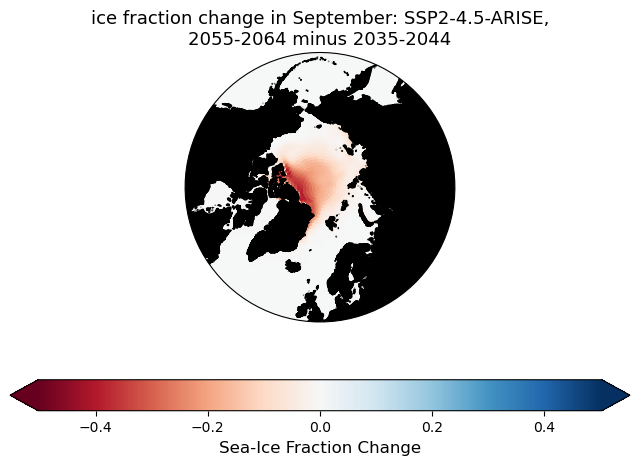

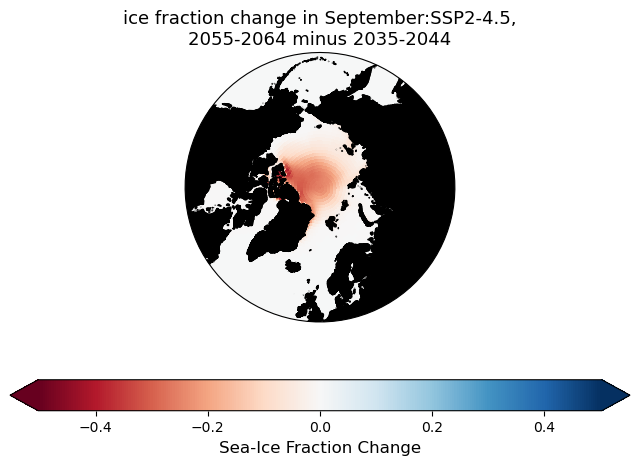

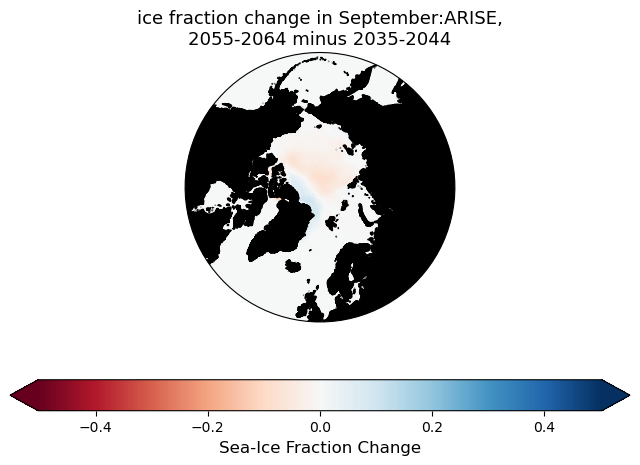

In [21]:
#for control-feedback plot
vmin1 = np.nanmin(iceAreaseptDiff_Control_Feedback)
vmax1 = np.nanmax(iceAreaseptDiff_Control_Feedback)
print(vmin1, vmax1)

#for control plot
vmin2 = np.nanmin(iceAreaCONTROLseptDiff)
vmax2 = np.nanmax(iceAreaCONTROLseptDiff)
print(vmin2, vmax2)

#for feedback plot
vmin3 = np.nanmin(iceAreaFEEDBACKseptDiff)
vmax3 = np.nanmax(iceAreaFEEDBACKseptDiff)
print(vmin3, vmax3)

vmin = min(vmin1, vmin2, vmin3)
print(vmin)
vmax = max(vmax1, vmax2, vmax3)
print(vmax)

# To get a nice colorbar, vmin and vmax should be negative and positive values of the same number
if np.abs(vmin) > vmax: vmax = np.abs(vmin)
elif vmax > np.abs(vmin): vmin = vmax*(-1)

warnings.simplefilter("ignore")
fig, ax = make_maps(iceAreaseptDiff_Control_Feedback,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Fraction Change','ice fraction change in September: SSP2-4.5-ARISE,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_frac_change_sept_20552064-20352044')
fig, ax = make_maps(iceAreaCONTROLseptDiff,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Fraction Change','ice fraction change in September:SSP2-4.5,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_frac_change_sept_control_20552064-20352044')
fig, ax = make_maps(iceAreaFEEDBACKseptDiff,latIce,lonIce,vmin,vmax,'RdBu','Sea-Ice Fraction Change','ice fraction change in September:ARISE,\n2055-2064 minus 2035-2044',
           'ssp245_ens1_2m_ice_frac_change_sept_feedback_20552064-20352044')

It is clearly visible that ARISE is able to prevent reduction of sea-ice fraction in September and SSP shows a considerable decrease in ice fraction. The first map showing the difference between SSP and ARISE shows SSP has much lesser ice than ARISE!
The third map shows a clear line - it is blue on one side and red on the other! (interesting)

In [81]:
#getting 3 plots side by side
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namefracSept):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'black', facecolor = 'black'))
    ax.set_title(str(namefracSept))
    return cf1

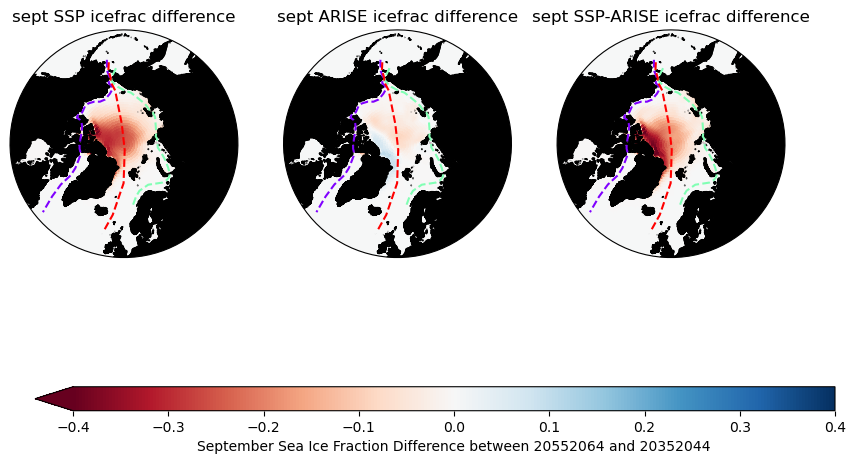

In [85]:
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -0.4
vmaxs = np.abs(vmins)
newdict6 = {}
newdict6[0] = iceAreaCONTROLseptDiff
newdict6[1] = iceAreaFEEDBACKseptDiff
newdict6[2] = iceAreaseptDiff_Control_Feedback
namefracSept = {}
namefracSept[0] = ('sept SSP icefrac difference')
namefracSept[1] = ('sept ARISE icefrac difference')
namefracSept[2] = ('sept SSP-ARISE icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict6[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict6[i-1], latIce, lonIce, norm, i, mycmap, namefracSept[i-1])
    shippingRoutes.plot(ax=ax, cmap='rainbow', linestyle='--')
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend="min")
cbar.set_label('September Sea Ice Fraction Difference between 20552064 and 20352044', fontsize = 10)
plt.savefig(figuredir + str(namefracSept) + '.jpg', dpi=1000, bbox_inches='tight')

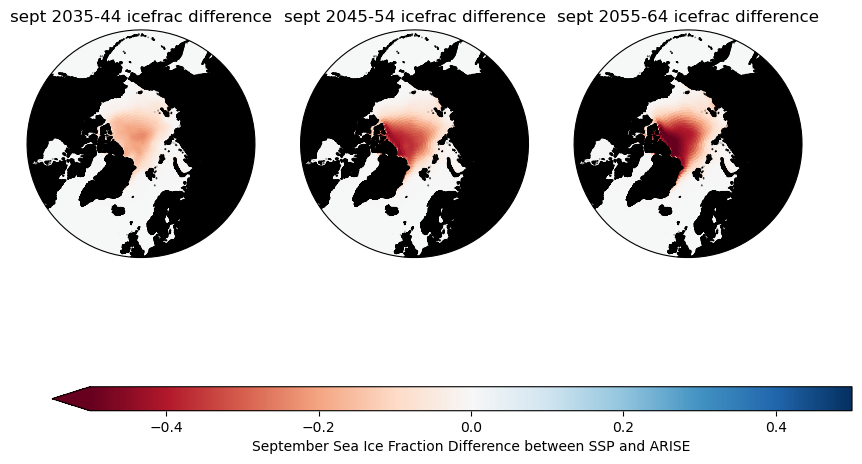

In [24]:
#plotting SSP-ARISE for 3 decades
fig = plt.figure(figsize =(10,6))
cols = 3; rows =1 
vmins = -0.5
vmaxs = np.abs(vmins)
newdict282 = {}
newdict282[0] = SSP_ARISEsept203544
newdict282[1] = SSP_ARISEsept204554
newdict282[2] = SSP_ARISEsept205564
namefracSept282 = {}
namefracSept282[0] = ('sept 2035-44 icefrac difference')
namefracSept282[1] = ('sept 2045-54 icefrac difference')
namefracSept282[2] = ('sept 2055-64 icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(newdict282[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, newdict282[i-1], latIce, lonIce, norm, i, mycmap, namefracSept282[i-1])
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal', extend="min")
cbar.set_label('September Sea Ice Fraction Difference between SSP and ARISE', fontsize = 10)
plt.savefig(figuredir + str(namefracSept) + '.jpg', dpi=1000, bbox_inches='tight')

### SEPTEMBER: SSP and ARISE ice fraction separately

In [27]:
import geopandas as gpd

In [29]:
fname = r'/Users/dpathak/Desktop/REU/data/Shipping_and_Hydrography/Arctic_Sea_Routes.shp'
shapes = gpd.read_file(fname)
shippingRoutes = shapes.loc[:, 'geometry']
# fig,ax = plt.subplots(figsize=(8,6))

In [65]:
#ARISE PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namefracARISEsept):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'dimgrey', facecolor = 'black'))
    ax.set_title(str(namefracARISEsept))
    plt.savefig(figuredir + str(namefracARISEsept) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

<xarray.DataArray 'ICEFRAC' ()>
array(0.9309085)
Coordinates:
    month    int64 9

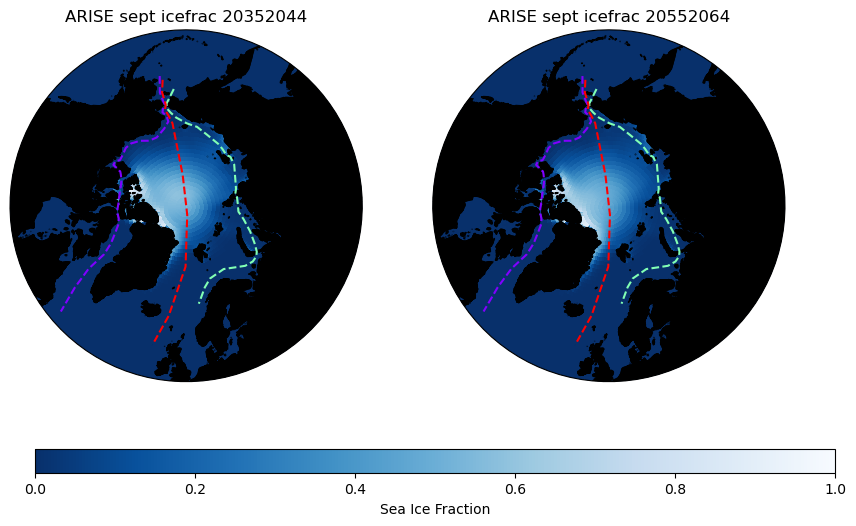

In [70]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = 1
fracdict3 = {}
fracdict3[0] = iceAreaFEEDBACKsept_20352044
fracdict3[1] = iceAreaFEEDBACKsept_20552064
# fracdict1[2] = iceAreaFEEDBACKMeanDiff
namefracARISEsept = {}
namefracARISEsept[0] = ('ARISE sept icefrac 20352044')
namefracARISEsept[1] = ('ARISE sept icefrac 20552064')
# namefracARISE[2] = ('ARISE icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(fracdict3[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, fracdict3[i-1], latIce, lonIce, norm, i, mycmap, namefracARISEsept[i-1])
    shippingRoutes.plot(ax=ax, cmap='rainbow', linestyle='--')
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal')
cbar.set_label('Sea Ice Fraction', fontsize = 10)
np.max(iceAreaFEEDBACKsept_20552064)

In [63]:
#SSP PLOTS
def subplots(ax, var, latitude, lonIce, norm, i, mycmap, namefracSSPsept):
    var,lonIce = add_cyclic_point(var,coord=lonIce)
    ax.set_extent([180, -180, 50, 90], crs=ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_facecolor('0.98')
    
    cf1 = ax.pcolormesh(lonIce,latIce,var,transform=ccrs.PlateCarree(), 
                  norm=norm, cmap=mycmap)
    ax.coastlines(linewidth=0.002)
    # ax.outline_patch.set_linewidth(5)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'dimgrey', facecolor = 'black'))
    ax.set_title(str(namefracSSPsept))
    plt.savefig(figuredir + str(namefracSSPsept) + '.jpg', dpi=1000, bbox_inches='tight')
    return cf1

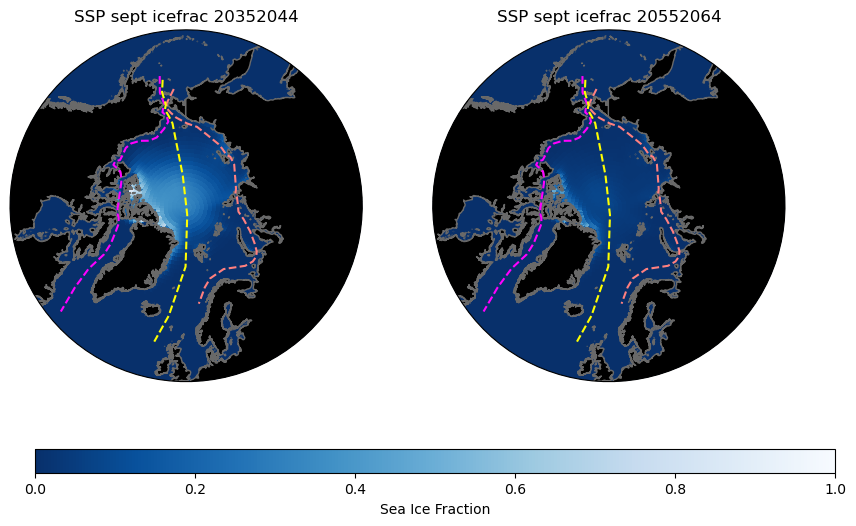

In [64]:
fig = plt.figure(figsize =(10,6))
cols = 2; rows =1 
vmins = 0
vmaxs = 1
fracdict4 = {}
fracdict4[0] = iceAreaCONTROLsept_20352044
fracdict4[1] = iceAreaCONTROLsept_20552064
# fracdict1[2] = iceAreaFEEDBACKMeanDiff
namefracSSPsept = {}
namefracSSPsept[0] = ('SSP sept icefrac 20352044')
namefracSSPsept[1] = ('SSP sept icefrac 20552064')
# namefracARISE[2] = ('ARISE icefrac difference')
for i in range(1, cols*rows+1):
    if np.nanmin(fracdict4[i-1]) < 0:
        mycmap = 'RdBu'
    else:
         mycmap = 'Blues_r'
    if vmins < 0. and vmaxs > 0.:
        norm = mcolors.TwoSlopeNorm(vmin=vmins, vcenter=0, vmax=vmaxs)
    else:
        norm = mcolors.Normalize(vmin=vmins, vmax=vmaxs)
    ax = fig.add_subplot(rows, cols, i, projection=ccrs.NorthPolarStereo())
    cf1 = subplots(ax, fracdict4[i-1], latIce, lonIce, norm, i, mycmap, namefracSSPsept[i-1])
    shippingRoutes.plot(ax=ax, cmap='spring', linestyle='--')
cbar_ax = fig.add_axes([0.15, 0.05, 0.8, 0.04])
cbar = plt.colorbar(cf1, cax=cbar_ax, orientation = 'horizontal')
cbar.set_label('Sea Ice Fraction', fontsize = 10)
# np.max(iceAreaFEEDBACKsept_20552064)

### Timeseries: Annual:

### SSP icefraction 2015 to 2069: ARISE icefraction 2035 to 2069:

In [29]:
def createlist(r1, r2):
    return list(range(r1, r2+1))
SSPtimearray = createlist(2015,2069)
ARISEtimearray = createlist(2035,2069)
print(ARISEtimearray)

[2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069]


In [342]:
# #reading in landmask data
# ds = xr.open_dataset(dataDir + 'landMaskForSeaIce.nc',
#                     decode_times = False)
# landmask = ds.landmask
# landmask = landmask.fillna(0)

# #print(ds)
# ###both SSP and ARISE
# latmin = 66.5 #arctic circle = 66.5, Canadian/Russian coast = 60-82/80
# latmax = 90
# lonmin = 0 #arctic circle = 0, Canadian/Russian coast = 180,0
# lonmax = 360 #arctic circle = 360, Canadian/Russian coast = 360,180
# latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
# latmax_ind = int(np.abs(latmax-latIce).argmin())
# lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
# lonmax_ind = int(np.abs(lonmax-lonIce).argmin())
# SSPicefrac = SSPicefracTSmean[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# ARISEicefrac = ARISEicefracTSmean[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# # print(landmaskTS)
# print(landmaskTS[:,20:25])
# lonmesh,latmesh = np.meshgrid(SSPicefrac.lon,SSPicefrac.lat)#getting mesh of lat-long of specified area
# weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2
# # weights[landmaskTS==1] = np.nan
# weights = np.where(landmaskTS==0, weights, np.nan)#where 0(ocean) - gives ocean weights, else gives nan(land)
# weights = np.ma.asanyarray(weights)
# # print(weights)
# print(weights[:,20:25])
# masked_dataSSP = np.empty((SSPicefrac.shape[0],SSPicefrac.shape[1],SSPicefrac.shape[2]))#0 array
# masked_dataSSP[:] = np.nan
# # print(masked_dataSSP[1,:,20:25])
# masked_dataARISE = np.empty((ARISEicefrac.shape[0],ARISEicefrac.shape[1],ARISEicefrac.shape[2]))#need separate for SSP and ARISE because different time range
# masked_dataARISE[:] = np.nan
# weights3DSSP = np.repeat(weights[np.newaxis, :, :], SSPicefrac.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# weights3DARISE = np.repeat(weights[np.newaxis, :, :], ARISEicefrac.shape[0], axis=0)
# for iyear in range(SSPicefrac.shape[0]):
#     masked_dataSSP[iyear,:,:] = np.ma.masked_array(SSPicefrac[iyear,:,:], mask=(landmaskTS==1))#all land icefrac data becomes NAN
#     # weights.mask = masked_dataSSP.mask
#     averageSSP = np.ma.average(masked_dataSSP,axis=(1,2),weights=weights3DSSP)#weighted avg of sea data - overlooks NANs
# for iyear in range(ARISEicefrac.shape[0]):
#     masked_dataARISE[iyear,:,:] = np.ma.masked_array(ARISEicefrac[iyear,:,:], mask=(landmaskTS==1))#all land icefrac data becomes NAN
#     # weights.mask = masked_dataARISE.mask
#     averageARISE = np.ma.average(masked_dataARISE,axis=(1,2),weights=weights3DARISE)
# print(masked_dataSSP[1,:,20:25])
# # print(averageSSP)
# # #FINDING % CHANGE:
# print('SSP ICEFRAC IN 2035=',averageSSP[20])#avg icefrac at 2035 when we initiate SAI
# print('SSP ICEFRAC IN 2069=',averageSSP[54])#in 2069
# percentSSPchange = (averageSSP[54] - averageSSP[20])*100/averageSSP[20]
# print('CHANGE IN SSP ICEFRAC=', percentSSPchange, str('%'))
# print('ARISE ICEFRAC IN 2035=',averageARISE[0])#avg icefrac at 2035 when we initiate SAI
# print('ARISE ICEFRAC IN 2069=',averageARISE[34])#in 2069
# percentARISEchange = (averageARISE[34] - averageARISE[0])*100/averageARISE[0]
# print('CHANGE IN ARISE ICEFRAC=', percentARISEchange, str('%'))

# #trying to make a loop that plots each ens member on same plot
# # for ensNum in range(len(ens)):
# #     latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
# #     latmax_ind = int(np.abs(latmax-latIce).argmin())
# #     lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
# #     lonmax_ind = int(np.abs(lonmax-lonIce).argmin())
# #     SSPplotdata = iceAreaCONTROLGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# #     ARISEplotdata = iceAreaFEEDBACKGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# #     landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# #     lonmesh,latmesh = np.meshgrid(SSPplotdata.lon,SSPplotdata.lat)#getting mesh of lat-long of specified area
# #     weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2
# #     masked_dataSSPens = np.zeros((SSPplotdata.shape[0],SSPplotdata.shape[1],SSPplotdata.shape[2]))#0 array
# #     masked_dataARISEens = np.zeros((ARISEplotdata.shape[0],ARISEplotdata.shape[1],ARISEplotdata.shape[2]))#need separate for SSP and ARISE because different time range
# #     weights3DSSPens = np.repeat(weights[np.newaxis, :, :], SSPplotdata.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# #     weights3DARISEens = np.repeat(weights[np.newaxis, :, :], ARISEplotdata.shape[0], axis=0)
# #     for iyear in range(SSPplotdata.shape[0]):
# #       masked_dataSSPens[iyear,:,:] = np.ma.masked_array(SSPplotdata[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
# #       averageSSPens = np.ma.average(masked_dataSSPens,axis=(1,2),weights=weights3DSSPens)#weighted avg of sea data - overlooks NANs
# #     for iyear in range(ARISEplotdata.shape[0]):
# #       masked_dataARISEens[iyear,:,:] = np.ma.masked_array(ARISEplotdata[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
# #       averageARISEens = np.ma.average(masked_dataARISEens,axis=(1,2),weights=weights3DARISEens)
# #     # print(averageSSPens)
# #     plt.xlim(2015,2070)
# #     # plt.ylim(0.08, 0.42)
# #     plt.xlabel('Year')
# #     plt.ylabel('Sea Ice Fraction')
# #     plt.plot(ARISEtimearray, averageARISEens, color = 'lightskyblue', linestyle = ":")
# #     plt.plot(SSPtimearray, averageSSPens, color = 'salmon', linestyle = ":")
# #graph design
# plt.title('Annual ICEFRAC: above Arctic Circle')
# a = plt.plot(SSPtimearray, averageSSP, color = 'red', label = "SSP")
# b = plt.plot(ARISEtimearray, averageARISE, color = 'blue', label = "ARISE")
# plt.axvline(x=2035, linestyle = ':', color = 'black')
# plt.axhline(y=averageSSP[20], linestyle = ':', color = 'black')
# plt.axhline(y=0.15, linestyle = '--', color = 'teal')
# plt.xlim(2015,2070)
# plt.ylim(0,1)
# plt.legend()
# # plt.text(2040, 0.22, 'SSP CHANGE = -15.14%', fontsize = 12)
# # plt.text(2040, 0.2, 'ARISE CHANGE = -1.965%', fontsize = 12)

In [344]:
# print(landmaskTS[:, 20:25])
# print()
# print(weights[:, 20:25])
# print()
# print(masked_dataSSP[1,:,20:25])

In [166]:
# SSPseptTimeseriesdatadict = {}
# for ensNum in range(len(ens)):
#     ensSSPdataSept = iceAreaCONTROL[ens[ensNum]].sel(time=iceAreaCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))
#     SSPseptTimeseriesdatadict[0] = ensSSPdataSept.concatenate
#     SSPseptTimeseriesdatadict[1] = ensNum
# SSPseptTimeseriesdatadict[1]

### September:

In [345]:
# latmin2 = 60
# latmax2 = 82
# lonmin2 = 180
# lonmax2 = 360
# latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
# latmax_ind = int(np.abs(latmax2-latIce).argmin())
# lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
# lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())

# SSPicefracSeptTS = septSSPdataTS[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# ARISEicefracSeptTS = septARISEdataTS[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# lonmesh,latmesh = np.meshgrid(SSPicefracSeptTS.lon,SSPicefracSeptTS.lat)#getting mesh of lat-long of specified area
# weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

# masked_dataSSPsept = np.zeros((SSPicefracSeptTS.shape[0],SSPicefracSeptTS.shape[1],SSPicefracSeptTS.shape[2]))#0 array
# masked_dataARISEsept = np.zeros((ARISEicefracSeptTS.shape[0],ARISEicefracSeptTS.shape[1],ARISEicefracSeptTS.shape[2]))#need separate for SSP and ARISE because different time range
# weights3DSSPsept = np.repeat(weights[np.newaxis, :, :], SSPicefracSeptTS.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# weights3DARISEsept = np.repeat(weights[np.newaxis, :, :], ARISEicefracSeptTS.shape[0], axis=0)
# for iyear in range(SSPicefracSeptTS.shape[0]):
#   masked_dataSSPsept[iyear,:,:] = np.ma.masked_array(SSPicefracSeptTS[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageSSPsept = np.ma.average(masked_dataSSPsept,axis=(1,2),weights=weights3DSSPsept)#weighted avg of sea data - overlooks NANs
# for iyear in range(ARISEicefracSeptTS.shape[0]):
#   masked_dataARISEsept[iyear,:,:] = np.ma.masked_array(ARISEicefracSeptTS[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageARISEsept = np.ma.average(masked_dataARISEsept,axis=(1,2),weights=weights3DARISEsept)
# # print(masked_dataSSPsept[iyear,:,:])

# #FINDING % CHANGE:
# print('SSP ICEFRAC IN 2035=',averageSSPsept[20])#avg icefrac at 2035 when we initiate SAI
# print('SSP ICEFRAC IN 2069=',averageSSPsept[54])#in 2069
# percentSSPseptchange = (averageSSPsept[54] - averageSSPsept[20])*100/averageSSPsept[20]
# print('CHANGE IN SSP ICEFRAC=', percentSSPseptchange, str('%'))
# print('ARISE ICEFRAC IN 2035=',averageARISEsept[0])#avg icefrac at 2035 when we initiate SAI
# print('ARISE ICEFRAC IN 2069=',averageARISEsept[34])#in 2069
# percentARISEseptchange = (averageARISEsept[34] - averageARISEsept[0])*100/averageARISEsept[0]
# print('CHANGE IN ARISE ICEFRAC=', percentARISEseptchange, str('%'))

# for ensNum in range(len(ens)):
#     latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
#     latmax_ind = int(np.abs(latmax2-latIce).argmin())
#     lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
#     lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())
    
#     SSPplotdata = iceAreaCONTROL[ens[ensNum]].sel(time=iceAreaCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
#     ARISEplotdata = iceAreaFEEDBACK[ens[ensNum]].sel(time=iceAreaFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
#     landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
#     lonmesh,latmesh = np.meshgrid(SSPplotdata.lon,SSPplotdata.lat)#getting mesh of lat-long of specified area
#     weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2
#     masked_dataSSPens = np.zeros((SSPplotdata.shape[0],SSPplotdata.shape[1],SSPplotdata.shape[2]))#0 array
#     masked_dataARISEens = np.zeros((ARISEplotdata.shape[0],ARISEplotdata.shape[1],ARISEplotdata.shape[2]))#need separate for SSP and ARISE because different time range
#     weights3DSSPens = np.repeat(weights[np.newaxis, :, :], SSPplotdata.shape[0], axis=0)#dim 3 added=time from ICEFRAC
#     weights3DARISEens = np.repeat(weights[np.newaxis, :, :], ARISEplotdata.shape[0], axis=0)
#     for iyear in range(SSPplotdata.shape[0]):
#       masked_dataSSPens[iyear,:,:] = np.ma.masked_array(SSPplotdata[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageSSPens = np.ma.average(masked_dataSSPens,axis=(1,2),weights=weights3DSSPens)#weighted avg of sea data - overlooks NANs
#     for iyear in range(ARISEplotdata.shape[0]):
#       masked_dataARISEens[iyear,:,:] = np.ma.masked_array(ARISEplotdata[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageARISEens = np.ma.average(masked_dataARISEens,axis=(1,2),weights=weights3DARISEens)
#     # print(averageSSPens)
#     plt.xlim(2015,2070)
#     plt.plot(ARISEtimearray, averageARISEens, color = 'lightskyblue', linestyle = ":")
#     plt.plot(SSPtimearray, averageSSPens, color = 'salmon', linestyle = ":")
# #graph design
# plt.ylim(0,0.25)
# plt.xlim(2015,2070)
# plt.xlabel('Year')
# plt.ylabel('Sea Ice Fraction')
# plt.title('September ICEFRAC: Canadian coast: 60-82lat, 180-360lon')
# plt.plot(SSPtimearray, averageSSPsept, color = 'red', label = "SSP")
# plt.plot(ARISEtimearray, averageARISEsept, color = 'blue', label = "ARISE")
# plt.axvline(x=2035, linestyle = ':', color = 'black')
# plt.axhline(y=averageSSPsept[20], linestyle = ':', color = 'black')
# plt.axhline(y=0.15, linestyle = ':', color = 'teal')
# plt.legend(loc='upper right')
# plt.text(2040, 0.19, 'SSP CHANGE = -82.828%', fontsize = 12)
# plt.text(2040, 0.17, 'ARISE CHANGE = 10.123%', fontsize = 12)


In [346]:
# print(weights3DARISEsept.shape)
# print(ARISEicefracSeptTS.shape)
# print(weights.shape)
# iceAreaCONTROL[ens[ensNum]].sel(time=iceAreaCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))
# print(masked_dataSSPens[1,:,:])
# print()
# print(weights3DSSPens[1,:,:])
# print()
# print(landmaskTS)

### July-October:

In [347]:
# latmin3 = 60
# latmax3 = 82
# lonmin3 = 180
# lonmax3 = 360
# latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
# latmax_ind = int(np.abs(latmax3-latIce).argmin())
# lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
# lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())

# SSPicefracJASO = JASOmeanSSP[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
# ARISEicefracJASO = JASOmeanARISE[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
# landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
# lonmesh,latmesh = np.meshgrid(SSPicefracJASO.lon,SSPicefracJASO.lat)#getting mesh of lat-long of specified area
# weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

# masked_dataSSPJASO = np.zeros((SSPicefracJASO.shape[0],SSPicefracJASO.shape[1],SSPicefracJASO.shape[2]))#0 array
# masked_dataARISEJASO = np.zeros((ARISEicefracJASO.shape[0],ARISEicefracJASO.shape[1],ARISEicefracJASO.shape[2]))#need separate for SSP and ARISE because different time range
# weights3DSSPJASO = np.repeat(weights[np.newaxis, :, :], SSPicefracJASO.shape[0], axis=0)#dim 3 added=time from ICEFRAC
# weights3DARISEJASO = np.repeat(weights[np.newaxis, :, :], ARISEicefracJASO.shape[0], axis=0)
# for iyear in range(SSPicefracJASO.shape[0]):
#   masked_dataSSPJASO[iyear,:,:] = np.ma.masked_array(SSPicefracJASO[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageSSPJASO = np.ma.average(masked_dataSSPJASO,axis=(1,2),weights=weights3DSSPJASO)#weighted avg of sea data - overlooks NANs
# for iyear in range(ARISEicefracJASO.shape[0]):
#   masked_dataARISEJASO[iyear,:,:] = np.ma.masked_array(ARISEicefracJASO[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#   averageARISEJASO = np.ma.average(masked_dataARISEJASO,axis=(1,2),weights=weights3DARISEJASO)
# # print(masked_dataSSPJASO[iyear,:,:])

# #FINDING % CHANGE:
# print('SSP ICEFRAC IN 2035=',averageSSPJASO[20])#avg icefrac at 2035 when we initiate SAI
# print('SSP ICEFRAC IN 2069=',averageSSPJASO[54])#in 2069
# percentSSPJASOchange = (averageSSPJASO[54] - averageSSPJASO[20])*100/averageSSPJASO[20]
# print('CHANGE IN SSP ICEFRAC=', percentSSPJASOchange, str('%'))
# print('ARISE ICEFRAC IN 2035=',averageARISEJASO[0])#avg icefrac at 2035 when we initiate SAI
# print('ARISE ICEFRAC IN 2069=',averageARISEJASO[34])#in 2069
# percentARISEJASOchange = (averageARISEJASO[34] - averageARISEJASO[0])*100/averageARISEJASO[0]
# print('CHANGE IN ARISE ICEFRAC=', percentARISEJASOchange, str('%'))
# for ensNum in range(len(ens)):
#     latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
#     latmax_ind = int(np.abs(latmax3-latIce).argmin())
#     lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
#     lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())
#     a = iceAreaCONTROL[ens[ensNum]].sel(time=iceAreaCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
#     b = a.groupby('time.year').mean(dim='time', skipna = True)
#     c = iceAreaFEEDBACK[ens[ensNum]].sel(time=iceAreaFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
#     d = c.groupby('time.year').mean(dim='time', skipna = True)
#     SSPicefracJASOens = b[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind] #ICEFRAC data for the specified area
#     ARISEicefracJASOens = d[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
#     landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#landmask data for specified area
#     lonmesh,latmesh = np.meshgrid(SSPicefracJASOens.lon,SSPicefracJASOens.lat)#getting mesh of lat-long of specified area
#     weights = np.cos(np.deg2rad(latmesh))#weighting each grid box, dim=2

#     masked_dataSSPJASOens = np.zeros((SSPicefracJASOens.shape[0],SSPicefracJASOens.shape[1],SSPicefracJASOens.shape[2]))#0 array
#     masked_dataARISEJASOens = np.zeros((ARISEicefracJASOens.shape[0],ARISEicefracJASOens.shape[1],ARISEicefracJASOens.shape[2]))#need separate for SSP and ARISE because different time range
#     weights3DSSPJASOens = np.repeat(weights[np.newaxis, :, :], SSPicefracJASOens.shape[0], axis=0)#dim 3 added=time from ICEFRAC
#     weights3DARISEJASOens = np.repeat(weights[np.newaxis, :, :], ARISEicefracJASOens.shape[0], axis=0)
#     for iyear in range(SSPicefracJASOens.shape[0]):
#       masked_dataSSPJASOens[iyear,:,:] = np.ma.masked_array(SSPicefracJASOens[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageSSPJASOens = np.ma.average(masked_dataSSPJASOens,axis=(1,2),weights=weights3DSSPJASOens)#weighted avg of sea data - overlooks NANs
#     for iyear in range(ARISEicefracJASOens.shape[0]):
#       masked_dataARISEJASOens[iyear,:,:] = np.ma.masked_array(ARISEicefracJASOens[iyear,:,:], ~np.isnan(landmaskTS))#all land icefrac data becomes NAN
#       averageARISEJASOens = np.ma.average(masked_dataARISEJASOens,axis=(1,2),weights=weights3DARISEJASOens)
#     plt.plot(SSPtimearray, averageSSPJASOens, color = 'salmon', linestyle = ":")
#     plt.plot(ARISEtimearray, averageARISEJASOens, color = 'lightskyblue', linestyle = ":")
# #graph design
# plt.ylim(0,0.3)
# plt.xlim(2015,2070)
# plt.xlabel('Year')
# plt.ylabel('Sea Ice Fraction')
# plt.title('JULY-OCTOBER ICEFRAC: Canadian coast: 60-82lat,180-360lon')
# plt.plot(SSPtimearray, averageSSPJASO, color = 'red', label = "SSP")
# plt.plot(ARISEtimearray, averageARISEJASO, color = 'blue', label = "ARISE")
# plt.axvline(x=2035, linestyle = ':', color = 'black')
# plt.axhline(y=averageSSPJASO[20], linestyle = ':', color = 'black')
# plt.axhline(y=0.15, linestyle = '--', color = 'teal')
# plt.legend()
# plt.text(2040, 0.2, 'SSP CHANGE = -63.224%', fontsize = 12)
# plt.text(2040, 0.18, 'ARISE CHANGE = 5.581%', fontsize = 12)

In [87]:
SSPicefracTSmean.shape

(55, 43, 288)


### NEW timeseries: ANNUAL:

SSP ICETHIC IN 2035= 0.6114852063793673
SSP ICETHIC IN 2069= 0.517018921750536
CHANGE IN SSP ICETHIC= -15.448662313217788 %
ARISE ICETHIC IN 2035= 0.6227745540504358
ARISE ICETHIC IN 2069= 0.6084885047654759
CHANGE IN ARISE ICETHIC= -2.2939359342872168 %


Text(2040, 0.25, 'ARISE CHANGE =  -2.293%')

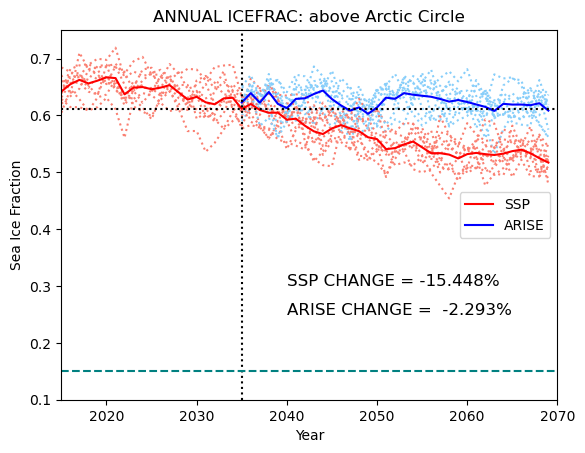

In [364]:
ds = xr.open_dataset(dataDir + 'landMaskForSeaIce.nc',
                    decode_times = False)
landmask = ds.landmask
landmask = landmask.fillna(0) #0-ocean,1-land
latmin = 66.5
latmax = 90
lonmin = 0 
lonmax = 360 
latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
latmax_ind = int(np.abs(latmax-latIce).argmin())
lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
lonmax_ind = int(np.abs(lonmax-lonIce).argmin())
SSPicefrac = SSPicefracTSmean[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
ARISEicefrac = ARISEicefracTSmean[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
landmaskTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
lonmesh,latmesh = np.meshgrid(SSPicefrac.lon,SSPicefrac.lat)
weights3Dssp = np.zeros((len(SSPicefrac.year),len(SSPicefrac.lat),len(SSPicefrac.lon)))
weights3Darise = np.zeros((len(ARISEicefrac.year),len(ARISEicefrac.lat),len(ARISEicefrac.lon)))
# print(len(SSPicethic.lat))
for iyear in range(len(SSPicefrac.year)):
    SSPicefrac[iyear,:,:] = np.ma.MaskedArray(SSPicefrac[iyear,:,:], mask=(landmaskTS==1))
    # print(SSPicethic[iyear,:,:].shape)
    weights3Dssp[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    # print(len(weights3Dssp[0,:,20:25]))
    weights3Dssp[iyear,:,:][landmaskTS==1] = np.nan
for iyear in range(len(ARISEicefrac.year)):
    ARISEicefrac[iyear,:,:] = np.ma.MaskedArray(ARISEicefrac[iyear,:,:], mask=(landmaskTS==1))
    weights3Darise[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    weights3Darise[iyear,:,:][landmaskTS==1] = np.nan
# print("weights:", weights3Dssp[0,:,20:25])
# print("landmask: ", landmask[:,20:25])
# print("data: ", SSPicethic[0,:,20:25])
# Annual time series 
SSPicefrac_masked = np.ma.MaskedArray(SSPicefrac, mask=np.isnan(SSPicefrac))
weightsSSP             = np.ma.asanyarray(weights3Dssp)
SSPicefrac_TS     = np.array([np.ma.average(
                                    SSPicefrac_masked[i],
                                    weights=weightsSSP[i]
                                    ) for i in range((SSPicefrac_masked.shape)[0])])
ARISEicefrac_masked = np.ma.MaskedArray(ARISEicefrac, mask=np.isnan(ARISEicefrac))
weightsARISE          = np.ma.asanyarray(weights3Darise)
ARISEicefrac_TS     = np.array([np.ma.average(
                                    ARISEicefrac_masked[i],
                                    weights=weightsARISE[i]
                                    ) for i in range((ARISEicefrac_masked.shape)[0])])
for ensNum in range(len(ens)):
    latmin_ind = int(np.abs(latmin-latIce).argmin()) #specifying what area I want to focus on
    latmax_ind = int(np.abs(latmax-latIce).argmin())
    lonmin_ind = int(np.abs(lonmin-lonIce).argmin())
    lonmax_ind = int(np.abs(lonmax-lonIce).argmin())
    SSPicefracens = iceAreaCONTROLGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
    ARISEicefracens = iceAreaFEEDBACKGrouped[ens[ensNum]][:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
    landmaskTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
    lonmesh,latmesh = np.meshgrid(SSPicefracens.lon,SSPicefracens.lat)
    weights3Dsspens = np.zeros((len(SSPicefracens.year),len(SSPicefracens.lat),len(SSPicefracens.lon)))
    weights3Dariseens = np.zeros((len(ARISEicefracens.year),len(ARISEicefracens.lat),len(ARISEicefracens.lon)))
    # print(len(SSPicethic.lat))
    for iyear in range(len(SSPicefracens.year)):
        SSPicefracens[iyear,:,:] = np.ma.MaskedArray(SSPicefracens[iyear,:,:], mask=(landmaskTSens==1))
        # print(SSPicethic[iyear,:,:].shape)
        weights3Dsspens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        # print(len(weights3Dssp[0,:,20:25]))
        weights3Dsspens[iyear,:,:][landmaskTSens==1] = np.nan
    for iyear in range(len(ARISEicefracens.year)):
        ARISEicefracens[iyear,:,:] = np.ma.MaskedArray(ARISEicefracens[iyear,:,:], mask=(landmaskTSens==1))
        weights3Dariseens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        weights3Dariseens[iyear,:,:][landmaskTSens==1] = np.nan
    # print("weights:", weights3Dssp[0,:,20:25])
    # print("landmask: ", landmask[:,20:25])
    # print("data: ", SSPicethic[0,:,20:25])
    # Annual time series 
    SSPicefracens_masked = np.ma.MaskedArray(SSPicefracens, mask=np.isnan(SSPicefracens))
    weightsSSPens             = np.ma.asanyarray(weights3Dsspens)
    SSPicefracens_TS     = np.array([np.ma.average(
                                        SSPicefracens_masked[i],
                                        weights=weightsSSPens[i]
                                        ) for i in range((SSPicefracens_masked.shape)[0])])
    ARISEicefracens_masked = np.ma.MaskedArray(ARISEicefracens, mask=np.isnan(ARISEicefracens))
    weightsARISEens          = np.ma.asanyarray(weights3Dariseens)
    ARISEicefracens_TS     = np.array([np.ma.average(
                                        ARISEicefracens_masked[i],
                                        weights=weightsARISEens[i]
                                        ) for i in range((ARISEicefracens_masked.shape)[0])])
    plt.plot(SSPtimearray, SSPicefracens_TS , color = 'salmon', linestyle=':')
    plt.plot(ARISEtimearray, ARISEicefracens_TS, color = 'lightskyblue', linestyle=':')

##FINDING % CHANGE:
print('SSP ICETHIC IN 2035=',SSPicefrac_TS[20])#avg icefrac at 2035 when we initiate SAI
print('SSP ICETHIC IN 2069=',SSPicefrac_TS[54])#in 2069
percentSSPchange = (SSPicefrac_TS[54] - SSPicefrac_TS[20])*100/SSPicefrac_TS[20]
print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
print('ARISE ICETHIC IN 2035=',ARISEicefrac_TS[0])#avg icefrac at 2035 when we initiate SAI
print('ARISE ICETHIC IN 2069=',ARISEicefrac_TS[34])#in 2069
percentARISEchange = (ARISEicefrac_TS[34] - ARISEicefrac_TS[0])*100/ARISEicefrac_TS[0]
print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

plt.plot(SSPtimearray, SSPicefrac_TS , color = 'red', label='SSP')
plt.plot(ARISEtimearray, ARISEicefrac_TS, color = 'blue', label='ARISE')
plt.xlim(2015,2070)
plt.ylim(0.1,0.75)
plt.xlabel('Year')
plt.ylabel('Sea Ice Fraction')
plt.title('ANNUAL ICEFRAC: above Arctic Circle')
plt.axvline(x=2035, linestyle = ':', color = 'black')
plt.axhline(y=SSPicefrac_TS[20], linestyle = ':', color = 'black')
plt.legend()
plt.axhline(y=0.15, linestyle = '--', color = 'teal')
plt.text(2040, 0.3, 'SSP CHANGE = -15.448%', fontsize = 12)
plt.text(2040, 0.25, 'ARISE CHANGE =  -2.293%', fontsize = 12)

### SEPTEMBER:

SSP ICETHIC IN 2035= 0.065423664705704
SSP ICETHIC IN 2069= 0.009577242334842587
CHANGE IN SSP ICETHIC= -85.36119555832893 %
ARISE ICETHIC IN 2035= 0.05068184956891124
ARISE ICETHIC IN 2069= 0.057034843543091567
CHANGE IN ARISE ICETHIC= 12.535047612148153 %


Text(2040, 0.32, 'ARISE CHANGE =  12.535%')

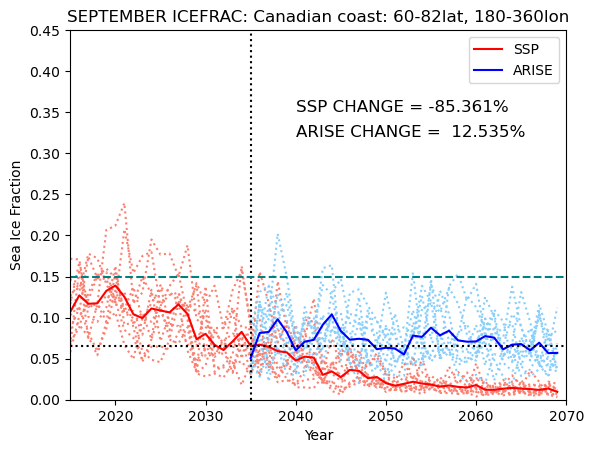

In [380]:
latmin2 = 60
latmax2 = 82
lonmin2 = 180
lonmax2 = 360 
latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
latmax_ind = int(np.abs(latmax2-latIce).argmin())
lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())
SSPicethicSeptTS = septSSPdataTS[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
ARISEicethicSeptTS = septARISEdataTS[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
landmaskTSSeptTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
lonmesh,latmesh = np.meshgrid(SSPicethicSeptTS.lon,SSPicethicSeptTS.lat)
weights3DsspSeptTS = np.zeros((SSPicethicSeptTS.shape[0],len(SSPicethicSeptTS.lat),len(SSPicethicSeptTS.lon)))
weights3DariseSeptTS = np.zeros((ARISEicethicSeptTS.shape[0],len(ARISEicethicSeptTS.lat),len(ARISEicethicSeptTS.lon)))
# print(len(SSPicethic.lat))
for iyear in range(SSPicethicSeptTS.shape[0]):
    SSPicethicSeptTS[iyear,:,:] = np.ma.MaskedArray(SSPicethicSeptTS[iyear,:,:], mask=(landmaskTSSeptTS==1))
    # print(SSPicethic[iyear,:,:].shape)
    weights3DsspSeptTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    # print(len(weights3Dssp[0,:,20:25]))
    weights3DsspSeptTS[iyear,:,:][landmaskTSSeptTS==1] = np.nan
for iyear in range(ARISEicethicSeptTS.shape[0]):
    ARISEicethicSeptTS[iyear,:,:] = np.ma.MaskedArray(ARISEicethicSeptTS[iyear,:,:], mask=(landmaskTSSeptTS==1))
    weights3DariseSeptTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    weights3DariseSeptTS[iyear,:,:][landmaskTSSeptTS==1] = np.nan
# print("weights:", weights3DsspSeptTS[0,:,20:25])
# print("landmask: ", landmaskTSSeptTS[:,20:25])
# print("data: ", SSPicethicSeptTS[0,:,20:25])
# Annual time series 
SSPicethicSept_masked = np.ma.MaskedArray(SSPicethicSeptTS, mask=np.isnan(SSPicethicSeptTS))
weightsSSPSept             = np.ma.asanyarray(weights3DsspSeptTS)
SSPicethicSept_TS     = np.array([np.ma.average(
                                    SSPicethicSept_masked[i],
                                    weights=weightsSSPSept[i]
                                    ) for i in range((SSPicethicSept_masked.shape)[0])])
ARISEicethicSept_masked = np.ma.MaskedArray(ARISEicethicSeptTS, mask=np.isnan(ARISEicethicSeptTS))
weightsARISESept          = np.ma.asanyarray(weights3DariseSeptTS)
ARISEicethicSept_TS     = np.array([np.ma.average(
                                    ARISEicethicSept_masked[i],
                                    weights=weightsARISESept[i]
                                    ) for i in range((ARISEicethicSept_masked.shape)[0])])
##FINDING % CHANGE:
print('SSP ICETHIC IN 2035=',SSPicethicSept_TS[20])#avg icefrac at 2035 when we initiate SAI
print('SSP ICETHIC IN 2069=',SSPicethicSept_TS[54])#in 2069
percentSSPchange = (SSPicethicSept_TS[54] - SSPicethicSept_TS[20])*100/SSPicethicSept_TS[20]
print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
print('ARISE ICETHIC IN 2035=',ARISEicethicSept_TS[0])#avg icefrac at 2035 when we initiate SAI
print('ARISE ICETHIC IN 2069=',ARISEicethicSept_TS[34])#in 2069
percentARISEchange = (ARISEicethicSept_TS[34] - ARISEicethicSept_TS[0])*100/ARISEicethicSept_TS[0]
print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

for ensNum in range(len(ens)):
    latmin_ind = int(np.abs(latmin2-latIce).argmin()) #specifying what area I want to focus on
    latmax_ind = int(np.abs(latmax2-latIce).argmin())
    lonmin_ind = int(np.abs(lonmin2-lonIce).argmin())
    lonmax_ind = int(np.abs(lonmax2-lonIce).argmin())
    SSPicethicSeptTSens = iceAreaCONTROL[ens[ensNum]].sel(time=iceAreaCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
    ARISEicethicSeptTSens = iceAreaFEEDBACK[ens[ensNum]].sel(time=iceAreaFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([9]))[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
    # landmaskTSSeptTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
    lonmesh,latmesh = np.meshgrid(SSPicethicSeptTSens.lon,SSPicethicSeptTSens.lat)
    weights3DsspSeptTSens = np.zeros((SSPicethicSeptTSens.shape[0],len(SSPicethicSeptTSens.lat),len(SSPicethicSeptTSens.lon)))
    weights3DariseSeptTSens = np.zeros((ARISEicethicSeptTSens.shape[0],len(ARISEicethicSeptTSens.lat),len(ARISEicethicSeptTSens.lon)))
    # print(len(SSPicethic.lat))
    for iyear in range(SSPicethicSeptTSens.shape[0]):
        SSPicethicSeptTSens[iyear,:,:] = np.ma.MaskedArray(SSPicethicSeptTSens[iyear,:,:], mask=(landmaskTSSeptTS==1))
        # print(SSPicethic[iyear,:,:].shape)
        weights3DsspSeptTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        # print(len(weights3Dssp[0,:,20:25]))
        weights3DsspSeptTSens[iyear,:,:][landmaskTSSeptTS==1] = np.nan
    for iyear in range(ARISEicethicSeptTSens.shape[0]):
        ARISEicethicSeptTSens[iyear,:,:] = np.ma.MaskedArray(ARISEicethicSeptTSens[iyear,:,:], mask=(landmaskTSSeptTS==1))
        weights3DariseSeptTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        weights3DariseSeptTSens[iyear,:,:][landmaskTSSeptTS==1] = np.nan
    # print("weights:", weights3DsspSeptTSens[0,:,20:25])
    # print("landmask: ", landmaskTSSeptTS[:,20:25])
    # print("data: ", SSPicethicSeptTSens[0,:,20:25])
   
    SSPicethicSeptens_masked = np.ma.MaskedArray(SSPicethicSeptTSens, mask=np.isnan(SSPicethicSeptTSens))
    weightsSSPSeptens             = np.ma.asanyarray(weights3DsspSeptTSens)
    SSPicethicSeptens_TS     = np.array([np.ma.average(
                                        SSPicethicSeptens_masked[i],
                                        weights=weightsSSPSeptens[i]
                                        ) for i in range((SSPicethicSeptens_masked.shape)[0])])
    ARISEicethicSeptens_masked = np.ma.MaskedArray(ARISEicethicSeptTSens, mask=np.isnan(ARISEicethicSeptTSens))
    weightsARISESeptens          = np.ma.asanyarray(weights3DariseSeptTSens)
    ARISEicethicSeptens_TS     = np.array([np.ma.average(
                                        ARISEicethicSeptens_masked[i],
                                        weights=weightsARISESeptens[i]
                                        ) for i in range((ARISEicethicSeptens_masked.shape)[0])])
    plt.plot(SSPtimearray, SSPicethicSeptens_TS , color = 'salmon', linestyle=':')
    plt.plot(ARISEtimearray, ARISEicethicSeptens_TS, color = 'lightskyblue', linestyle=':')
    
plt.plot(SSPtimearray, SSPicethicSept_TS , color = 'red', label='SSP')
plt.plot(ARISEtimearray, ARISEicethicSept_TS, color = 'blue', label='ARISE')
plt.xlim(2015,2070)
plt.ylim(0,0.45)
plt.xlabel('Year')
plt.ylabel('Sea Ice Fraction')
plt.title('SEPTEMBER ICEFRAC: Canadian coast: 60-82lat, 180-360lon')
plt.axvline(x=2035, linestyle = ':', color = 'black')
plt.axhline(y=SSPicethicSept_TS[20], linestyle = ':', color = 'black')
plt.axhline(y=0.15, linestyle = '--', color = 'teal')
plt.legend()
plt.text(2040, 0.35, 'SSP CHANGE = -85.361%', fontsize = 12)
plt.text(2040, 0.32, 'ARISE CHANGE =  12.535%', fontsize = 12)

In [ ]:
SSPicethicJASOTS.shape

### JASO:

SSP ICETHIC IN 2035= 0.1380303011881687
SSP ICETHIC IN 2069= 0.04768898348657649
CHANGE IN SSP ICETHIC= -65.45035178792745 %
ARISE ICETHIC IN 2035= 0.13255046615015098
ARISE ICETHIC IN 2069= 0.1379796373414007
CHANGE IN ARISE ICETHIC= 4.095927648492496 %


Text(2040, 0.42, 'ARISE CHANGE = 4.095%')

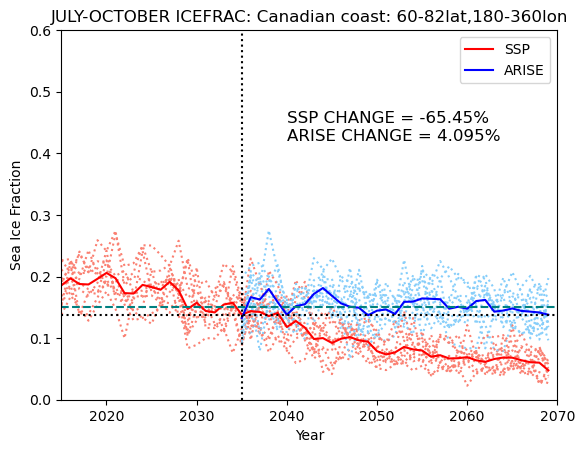

In [396]:
latmin3 = 60
latmax3 = 82
lonmin3 = 180
lonmax3 = 360 
latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
latmax_ind = int(np.abs(latmax3-latIce).argmin())
lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())
SSPicethicJASOTS = JASOmeanSSP[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
ARISEicethicJASOTS = JASOmeanARISE[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
landmaskTSJASOTS = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
lonmesh,latmesh = np.meshgrid(SSPicethicJASOTS.lon,SSPicethicJASOTS.lat)
weights3DsspJASOTS = np.zeros((SSPicethicJASOTS.shape[0],len(SSPicethicJASOTS.lat),len(SSPicethicJASOTS.lon)))
weights3DariseJASOTS = np.zeros((ARISEicethicJASOTS.shape[0],len(ARISEicethicJASOTS.lat),len(ARISEicethicJASOTS.lon)))
# print(len(SSPicethic.lat))
for iyear in range(SSPicethicJASOTS.shape[0]):
    SSPicethicJASOTS[iyear,:,:] = np.ma.MaskedArray(SSPicethicJASOTS[iyear,:,:], mask=(landmaskTSJASOTS==1))
    # print(SSPicethic[iyear,:,:].shape)
    weights3DsspJASOTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    # print(len(weights3Dssp[0,:,20:25]))
    weights3DsspJASOTS[iyear,:,:][landmaskTSJASOTS==1] = np.nan
for iyear in range(ARISEicethicJASOTS.shape[0]):
    ARISEicethicJASOTS[iyear,:,:] = np.ma.MaskedArray(ARISEicethicJASOTS[iyear,:,:], mask=(landmaskTSJASOTS==1))
    weights3DariseJASOTS[iyear,:,:] = np.cos(np.deg2rad(latmesh))
    weights3DariseJASOTS[iyear,:,:][landmaskTSJASOTS==1] = np.nan
# print("weights:", weights3Dssp[0,:,20:25])
# print("landmask: ", landmask[:,20:25])
# print("data: ", SSPicethic[0,:,20:25])
# Annual time series 
SSPicethicJASO_masked = np.ma.MaskedArray(SSPicethicJASOTS, mask=np.isnan(SSPicethicJASOTS))
weightsSSPJASO = np.ma.asanyarray(weights3DsspJASOTS)
SSPicethicJASO_TS     = np.array([np.ma.average(
                                    SSPicethicJASO_masked[i],
                                    weights=weightsSSPJASO[i]
                                    ) for i in range((SSPicethicJASO_masked.shape)[0])])
ARISEicethicJASO_masked = np.ma.MaskedArray(ARISEicethicJASOTS, mask=np.isnan(ARISEicethicJASOTS))
weightsARISEJASO          = np.ma.asanyarray(weights3DariseJASOTS)
ARISEicethicJASO_TS     = np.array([np.ma.average(
                                    ARISEicethicJASO_masked[i],
                                    weights=weightsARISEJASO[i]
                                    ) for i in range((ARISEicethicJASO_masked.shape)[0])])
##FINDING % CHANGE:
print('SSP ICETHIC IN 2035=',SSPicethicJASO_TS[20])#avg icefrac at 2035 when we initiate SAI
print('SSP ICETHIC IN 2069=',SSPicethicJASO_TS[54])#in 2069
percentSSPchange = (SSPicethicJASO_TS[54] - SSPicethicJASO_TS[20])*100/SSPicethicJASO_TS[20]
print('CHANGE IN SSP ICETHIC=', percentSSPchange, str('%'))
print('ARISE ICETHIC IN 2035=',ARISEicethicJASO_TS[0])#avg icefrac at 2035 when we initiate SAI
print('ARISE ICETHIC IN 2069=',ARISEicethicJASO_TS[34])#in 2069
percentARISEchange = (ARISEicethicJASO_TS[34] - ARISEicethicJASO_TS[0])*100/ARISEicethicJASO_TS[0]
print('CHANGE IN ARISE ICETHIC=', percentARISEchange, str('%'))

for ensNum in range(len(ens)):
    latmin_ind = int(np.abs(latmin3-latIce).argmin()) #specifying what area I want to focus on
    latmax_ind = int(np.abs(latmax3-latIce).argmin())
    lonmin_ind = int(np.abs(lonmin3-lonIce).argmin())
    lonmax_ind = int(np.abs(lonmax3-lonIce).argmin())
    a = iceAreaCONTROL[ens[ensNum]].sel(time=iceAreaCONTROL[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
    b = a.groupby('time.year').mean(dim='time', skipna = True)
    c = iceAreaFEEDBACK[ens[ensNum]].sel(time=iceAreaFEEDBACK[ens[ensNum]][:,:,:].time.dt.month.isin([7,8,9,10]))
    d = c.groupby('time.year').mean(dim='time', skipna = True)
    SSPicethicJASOTSens = b[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping data to specified area
    ARISEicethicJASOTSens = d[:,latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]
    landmaskTSJASOTSens = landmask[latmin_ind:latmax_ind,lonmin_ind:lonmax_ind]#cropping landmask to specified area
    lonmesh,latmesh = np.meshgrid(SSPicethicJASOTSens.lon,SSPicethicJASOTSens.lat)
    weights3DsspJASOTSens = np.zeros((SSPicethicJASOTSens.shape[0],len(SSPicethicJASOTSens.lat),len(SSPicethicJASOTSens.lon)))
    weights3DariseJASOTSens = np.zeros((ARISEicethicJASOTSens.shape[0],len(ARISEicethicJASOTSens.lat),len(ARISEicethicJASOTSens.lon)))
    # print(len(SSPicethic.lat))
    for iyear in range(SSPicethicJASOTSens.shape[0]):
        SSPicethicJASOTSens[iyear,:,:] = np.ma.MaskedArray(SSPicethicJASOTSens[iyear,:,:], mask=(landmaskTSJASOTSens==1))
        # print(SSPicethic[iyear,:,:].shape)
        weights3DsspJASOTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        # print(len(weights3Dssp[0,:,20:25]))
        weights3DsspJASOTSens[iyear,:,:][landmaskTSJASOTSens==1] = np.nan
    for iyear in range(ARISEicethicJASOTSens.shape[0]):
        ARISEicethicJASOTSens[iyear,:,:] = np.ma.MaskedArray(ARISEicethicJASOTSens[iyear,:,:], mask=(landmaskTSJASOTSens==1))
        weights3DariseJASOTSens[iyear,:,:] = np.cos(np.deg2rad(latmesh))
        weights3DariseJASOTSens[iyear,:,:][landmaskTSJASOTSens==1] = np.nan
    # print("weights:", weights3DsspSeptTSens[0,:,20:25])
    # print("landmask: ", landmaskTSSeptTS[:,20:25])
    # print("data: ", SSPicethicSeptTSens[0,:,20:25])
   
    SSPicethicJASOTSens_masked = np.ma.MaskedArray(SSPicethicJASOTSens, mask=np.isnan(SSPicethicJASOTSens))
    weightsSSPJASOTSens             = np.ma.asanyarray(weights3DsspJASOTSens)
    SSPicethicJASOens_TS     = np.array([np.ma.average(
                                        SSPicethicJASOTSens_masked[i],
                                        weights=weightsSSPJASOTSens[i]
                                        ) for i in range((SSPicethicJASOTSens_masked.shape)[0])])
    ARISEicethicJASOTSens_masked = np.ma.MaskedArray(ARISEicethicJASOTSens, mask=np.isnan(ARISEicethicJASOTSens))
    weightsARISEJASOTSens          = np.ma.asanyarray(weights3DariseJASOTSens)
    ARISEicethicJASOens_TS     = np.array([np.ma.average(
                                        ARISEicethicJASOTSens_masked[i],
                                        weights=weightsARISEJASOTSens[i]
                                        ) for i in range((ARISEicethicJASOTSens_masked.shape)[0])])
    plt.plot(SSPtimearray, SSPicethicJASOens_TS , color = 'salmon', linestyle=':')
    plt.plot(ARISEtimearray, ARISEicethicJASOens_TS, color = 'lightskyblue', linestyle=':')
    
plt.plot(SSPtimearray, SSPicethicJASO_TS , color = 'red', label='SSP')
plt.plot(ARISEtimearray, ARISEicethicJASO_TS, color = 'blue', label='ARISE')
plt.xlim(2015,2070)
plt.ylim(0,0.6)
plt.xlabel('Year')
plt.ylabel('Sea Ice Fraction')
plt.title('JULY-OCTOBER ICEFRAC: Canadian coast: 60-82lat,180-360lon')
plt.axvline(x=2035, linestyle = ':', color = 'black')
plt.axhline(y=SSPicethicJASO_TS[20], linestyle = ':', color = 'black')
plt.axhline(y=0.15, linestyle = '--', color = 'teal')
plt.legend()
plt.text(2040, 0.45, 'SSP CHANGE = -65.45%', fontsize = 12)
plt.text(2040, 0.42, 'ARISE CHANGE = 4.095%', fontsize = 12)